In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for graph drawn later
plt.figure(figsize=(10, 10), dpi=100)

# Loading the data
race = pd.read_csv('../data/races.csv', na_values='\\N')
results = pd.read_csv('../data/results.csv', na_values='\\N')
qualifying = pd.read_csv('../data/qualifying.csv', na_values='\\N')

<Figure size 1000x1000 with 0 Axes>

In [90]:
race.info() # Total 1125 rows and 18 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         394 non-null    object
 7   url          1125 non-null   object
 8   fp1_date     90 non-null     object
 9   fp1_time     68 non-null     object
 10  fp2_date     90 non-null     object
 11  fp2_time     68 non-null     object
 12  fp3_date     72 non-null     object
 13  fp3_time     53 non-null     object
 14  quali_date   90 non-null     object
 15  quali_time   68 non-null     object
 16  sprint_date  18 non-null     object
 17  sprint_time  15 non-null     object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB


In [91]:
results.info() # Total 26759 rows and 18 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26753 non-null  float64
 5   grid             26759 non-null  int64  
 6   position         15806 non-null  float64
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time             7680 non-null   object 
 12  milliseconds     7680 non-null   float64
 13  fastestLap       8252 non-null   float64
 14  rank             8510 non-null   float64
 15  fastestLapTime   8252 non-null   object 
 16  fastestLapSpeed  8252 non-null   float64
 17  statusId    

In [92]:
# For finding missing/null values
tables = [race, results,qualifying]
table_names = ['races','results','qualifying']

for i in range(len(tables)):
    print(f"{table_names[i]} missing values:\n", tables[i].isnull().sum())


races missing values:
 raceId            0
year              0
round             0
circuitId         0
name              0
date              0
time            731
url               0
fp1_date       1035
fp1_time       1057
fp2_date       1035
fp2_time       1057
fp3_date       1053
fp3_time       1072
quali_date     1035
quali_time     1057
sprint_date    1107
sprint_time    1110
dtype: int64
results missing values:
 resultId               0
raceId                 0
driverId               0
constructorId          0
number                 6
grid                   0
position           10953
positionText           0
positionOrder          0
points                 0
laps                   0
time               19079
milliseconds       19079
fastestLap         18507
rank               18249
fastestLapTime     18507
fastestLapSpeed    18507
statusId               0
dtype: int64
qualifying missing values:
 qualifyId           0
raceId              0
driverId            0
constructorId       0


In [93]:
# For finding duplicate values
tables = [race, results,qualifying]
names = ['races','results','qualifying']

for i in range(len(tables)):
    print(f"{names[i]} duplicates: ", tables[i].duplicated().sum())

races duplicates:  0
results duplicates:  0
qualifying duplicates:  0


In [94]:
clean_races = race[['raceId','year']]
clean_result = results[['raceId', 'driverId', 'positionOrder']].rename(columns={'positionOrder': 'race_position'})
clean_qualifying = qualifying[['raceId','driverId','position']].rename(columns={'position':'qualifying_position'})

master_df1 = clean_qualifying.merge(clean_result, on=['raceId','driverId'],how='inner').merge(clean_races,on='raceId',how='left')

master_df1 = master_df1.sort_values(by=['year', 'raceId', 'qualifying_position'],ascending=[True, True, True]).reset_index(drop=True)


In [95]:
df1 = master_df1.dropna(
    subset=['qualifying_position', 'race_position']
).copy()

df1.isna().sum() # To check if null values are there or not

raceId                 0
driverId               0
qualifying_position    0
race_position          0
year                   0
dtype: int64

In [96]:
df1.head(20)

,raceId,driverId,qualifying_position,race_position,year
0,257,102,1,13,1994
1,257,30,2,1,1994
2,257,55,3,3,1994
3,257,71,4,2,1994
4,257,49,5,20,1994
5,257,81,6,23,1994
6,257,91,7,6,1994
7,257,57,8,21,1994
8,257,50,9,16,1994
9,257,79,10,5,1994


In [97]:
df1.tail(20)

,raceId,driverId,qualifying_position,race_position,year
10474,1144,846,1,1,2024
10475,1144,857,2,10,2024
10476,1144,832,3,2,2024
10477,1144,807,4,8,2024
10478,1144,830,5,6,2024
10479,1144,842,6,7,2024
10480,1144,847,7,5,2024
10481,1144,4,8,9,2024
10482,1144,822,9,18,2024
10483,1144,815,10,20,2024


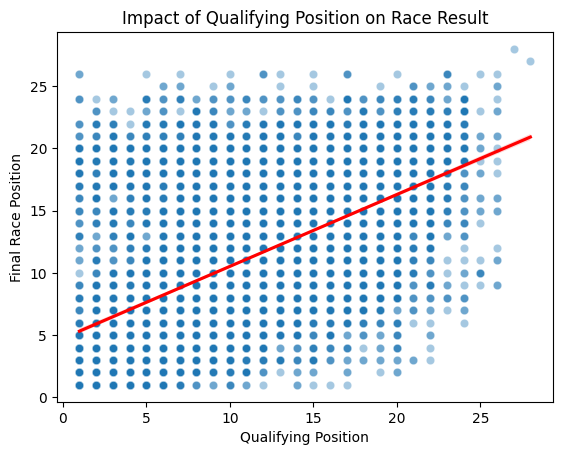

In [98]:
# Q1 Does qualifying position affect final race result?
sns.scatterplot(x='qualifying_position',y='race_position',data=df1,alpha = 0.4) 
plt.xlabel('Qualifying Position')
plt.ylabel('Final Race Position')
plt.title('Impact of Qualifying Position on Race Result')

sns.regplot(x='qualifying_position',y='race_position',data=df1,scatter=False,color='red')
plt.xlabel('Qualifying Position')
plt.ylabel('Final Race Position')
plt.title('Impact of Qualifying Position on Race Result')

plt.savefig('../visuals/impact_of_qualifying.png', dpi=300, bbox_inches='tight')

plt.show()

In [99]:
# Q2 How much do drivers typically gain or lose positions during a race compared to qualifying?
df1['position_change'] = (df1['qualifying_position'] - df1['race_position'])
df1['position_change'].describe()


count    10494.00000
mean        -0.01620
std          5.76781
min        -25.00000
25%         -2.00000
50%          1.00000
75%          3.00000
max         19.00000
Name: position_change, dtype: float64

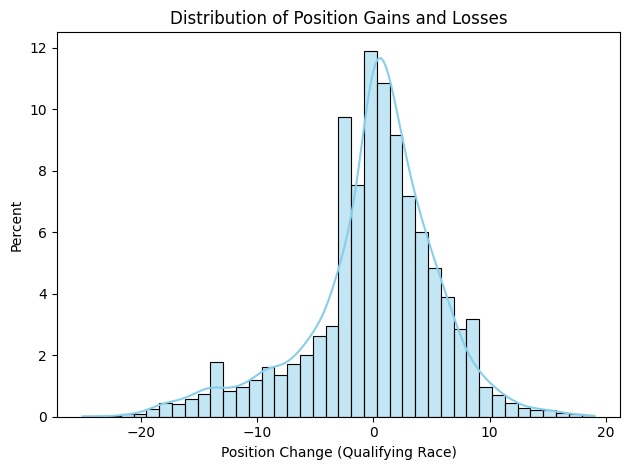

In [100]:
sns.histplot(df1['position_change'],bins=40,kde=True,stat="percent",color='skyblue')
plt.xlabel('Position Change (Qualifying Race)')
plt.title('Distribution of Position Gains and Losses')
plt.tight_layout()
plt.savefig('../visuals/position_gain_and_loss.png', dpi=300, bbox_inches='tight')
plt.show()